<a href="https://colab.research.google.com/github/cetusian/NER-product-names/blob/main/testing_ner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [ ]:
pipe = pipeline("token-classification", model="cetusian/ner-model-furniture-v2")

Some layers from the model checkpoint at cetusian/ner-model-furniture-v2 were not used when initializing TFDistilBertForTokenClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForTokenClassification were not initialized from the model checkpoint at cetusian/ner-model-furniture-v2 and are newly initialized: ['dropout_159']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
chunk_size = 1000
chunks = []

with open("/content/product_names.txt", "r") as file:
    while True:
        chunk = file.read(chunk_size)
        if not chunk:
            break
        chunks.append(chunk)

In [ ]:
found_entities = [entity['word'] for chunk in chunks for entity in pipe(chunk) if entity['entity'] in ['B-product', 'I-product']]

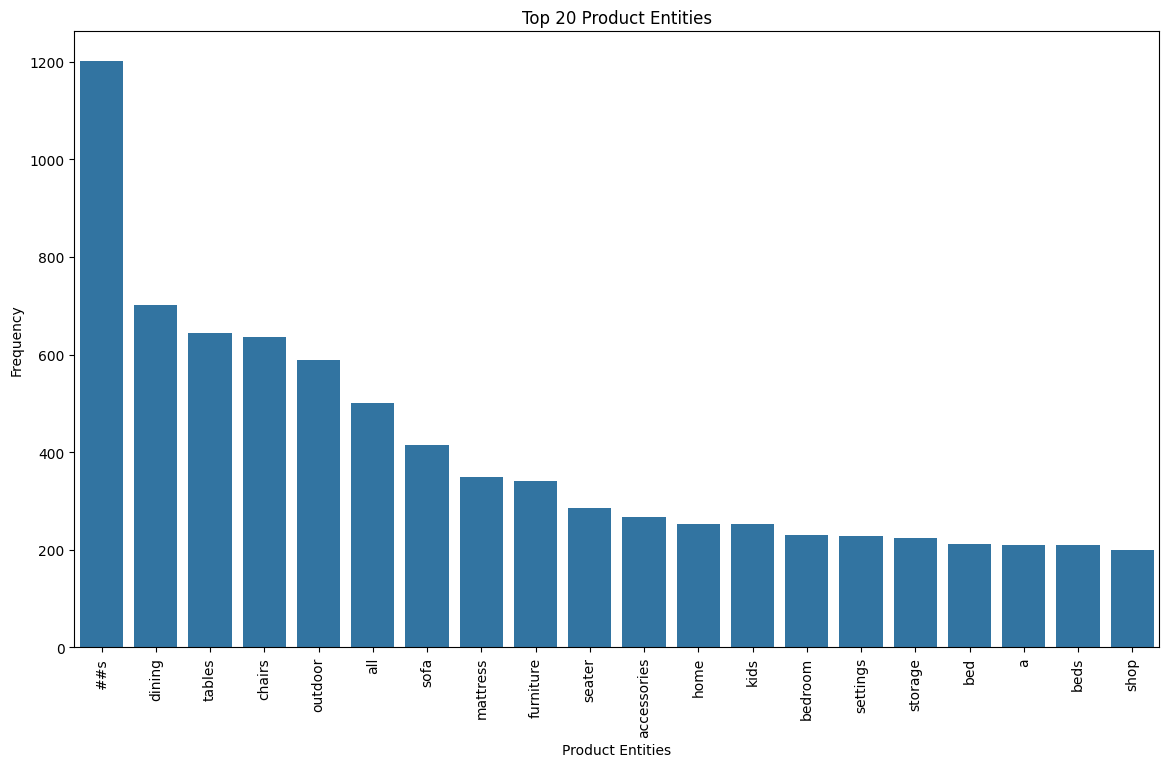

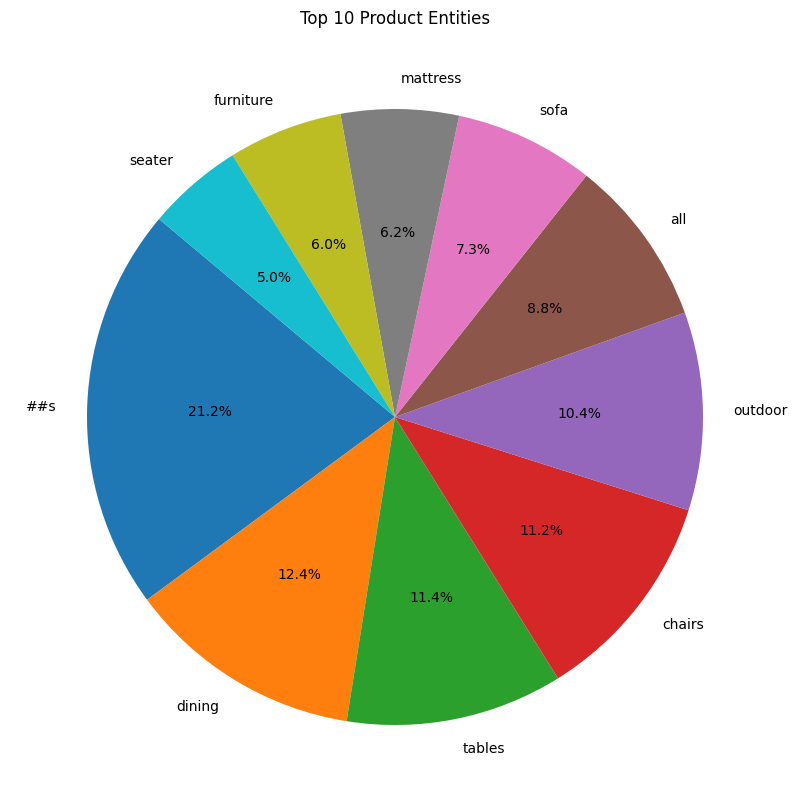

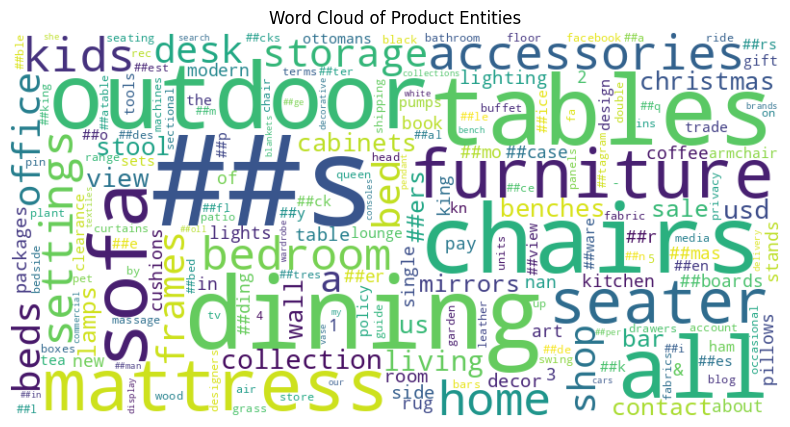

In [ ]:
def plot_entities(entities):
    entity_counts = Counter(entities)

    entity_counts = sorted(entity_counts.items(), key=lambda item: item[1], reverse=True)

    entities, counts = zip(*entity_counts)

    top_n = 20
    plt.figure(figsize=(14, 8))
    sns.barplot(x=list(entities[:top_n]), y=list(counts[:top_n]))
    plt.xticks(rotation=90)
    plt.xlabel("Product Entities")
    plt.ylabel("Frequency")
    plt.title(f"Top {top_n} Product Entities")
    plt.show()

    top_n = 10
    top_entities = entities[:top_n]
    top_counts = counts[:top_n]

    plt.figure(figsize=(10, 10))
    plt.pie(top_counts, labels=top_entities, autopct='%1.1f%%', startangle=140)
    plt.title(f"Top {top_n} Product Entities")
    plt.show()

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(entity_counts))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Product Entities")
    plt.show()

plot_entities(found_entities)


In [ ]:
print(found_entities)

['mattress', 'mattress', 'bedroom', 'packages', 'tables', 'bedroom', '##ng', '##ng', '##ng', '##ng', '##ng', '##ga', '##ages', 'bedroom', 'bedroom', 'mattress', 'frames', 'bedroom', 'bedside', '##s', 'wardrobe', '##s', 'tall', '##boys', 'dressing', 'tables', 'head', '##boards', 'ottomans', 'jewellery', 'cabinets', 'mattress', '##es', 'bed', 'frames', 'bedroom', 'packages', 'bedside', '##s', 'wardrobe', '##s', 'dressing', 'tables', 'head', '##boards', 'ottomans', 'jewellery', 'cabinets', 'benches', 'bar', 'stool', '##s', 'dining', 'chairs', 'dining', 'tables', 'dining', 'sets', 'side', '##boards', 'buffet', '##s', 'kitchen', 'benches', 'living', '##rs', 'sofa', '##s', 'tv', 'units', 'rec', '##liner', 'chairs', '&', 'side', 'tables', 'chairs', 'massage', 'chairs', 'hall', 'tables', 'bean', 'bags', 'arm', 'chairs', '##rs', 'office', '##off', '##ice', '##ice', 'packages', 'office', 'chairs', 'office', 'massage', 'chairs', 'desk', '##s', 'sit', 'stand', 'desk', '##s', 'monitor', 'stands', '